# Plots

Notebook to build plots for final report. No pressure to use this - just using it to make my life easier!

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (5,3)

atm = pd.read_csv('ATM_sample.csv')
atm.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,1018,10,1,0,0,0,72.750556
1,974,10,1,1,0,0,66.720482
2,96,2,0,0,0,1,19.189516
3,958,9,1,1,0,1,67.388669
4,103,4,0,1,0,1,15.813127


In [2]:
'''
Figure 1: Correlation heatmap
'''
fig_name = 'correlation_heatmap.jpg'

fig, axes = plt.subplots(1,1, figsize=(7.8,6.825))
sns.heatmap(ax=axes, data=atm.corr(), cmap='PiYG', center=0, annot=True, fmt='.2f')
plt.suptitle('Figure 2.1: Correlation heatmap', fontweight='bold')
plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)
# plt.show()

In [3]:
'''
Figure 2: Correlation heatmap split by downtown
'''
fig_name = 'correlation_heatmap_by_downtown.jpg'

uptown = atm[atm['Downtown'] == 0].drop(columns=['Downtown'], axis=1)
downtown = atm[atm['Downtown'] == 1].drop(columns=['Downtown'], axis=1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5.25) ,sharey=True, sharex=True)
# ax1.get_shared_y_axes()
sns.heatmap(ax=ax1, data=uptown.corr(), cmap='PiYG', center=0, annot=True, fmt='.2f')
ax1.set_title('Downtown = 0')
sns.heatmap(ax=ax2, data=downtown.corr(), cmap='PiYG', center=0, annot=True, fmt='.2f')
ax2.set_title('Downtown = 1')
plt.suptitle('Figure 2.2: Correlation heatmap split by Downtown', fontweight='bold')
plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)
# plt.show()

In [4]:
'''
Figure 3: Withdraw by Shops
'''
fig_name = 'withdraw_by_shops.jpg'

fig, axes = plt.subplots(1,1, figsize=(6,4.5))
sns.scatterplot(axes=axes, x='Shops', y='Withdraw', data=atm)

# Set titles
axes.set_xlabel('Shops')
axes.set_ylabel('Withdraw')
plt.suptitle('Figure 2.3: Withdraw by Shops', fontweight='bold')

plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)
# plt.show()

In [5]:
"""
Figure 4: Withdraw by Shops, coloured by Downtown
"""
fig_name = 'withdraw_by_shops_coloured.jpg'

fig, axes = plt.subplots(1,1, figsize=(6,4.5))
sns.scatterplot(axes=axes, x='Shops', y='Withdraw', hue='Downtown', data=atm)

# Set titles
axes.set_xlabel('Shops')
axes.set_ylabel('Withdraw')
plt.suptitle('Figure 2.4: Withdraw by Shops, coloured by Downtown', fontweight='bold')

plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)
# plt.show()

In [6]:
"""
Figure 5: Withdraw by Shops, coloured by Downtown
"""
fig_name = 'deciding_cutoff.jpg'

fig, axes = plt.subplots(1,2, figsize=(12,4.5))

# Histogram
sns.histplot(ax=axes[0], data=atm['Withdraw'], discrete=True)
axes[0].axvline(x=86, c='red')
axes[0].set_xlabel('Withdraw')
axes[0].set_ylabel('Number of rows')
axes[0].set_xticks([20,40,60,80,86,100])
axes[0].set_title('Histogram of Withdraw')

# Scatterplot
sns.scatterplot(axes=axes[1], x='Shops', y='Withdraw', data=atm)
axes[1].axhline(y=86, c='red')

## Set titles
axes[1].set_xlabel('Shops')
axes[1].set_ylabel('Withdraw')
axes[1].set_yticks([20,40,60,80,86,100])
axes[1].set_title('Withdraw by Shops')
fig.suptitle('Figure 2.5: Deciding cut-off of Withdraw = 86', fontweight='bold')

plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)
# plt.show()

In [7]:
print(len(atm[(atm.Weekday == 0) & (atm.Center == 1) & (atm.Downtown == 1)]))
print(len(atm[(atm.Withdraw > 86)]))

atm[atm.Withdraw > 86]

455
452


,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
29,964,9,1,0,1,0,90.142804
60,1002,8,1,0,1,1,97.015999
71,985,13,1,0,1,0,88.855532
139,1014,9,1,0,1,0,96.834215
147,1006,10,1,0,1,0,95.185128
...,...,...,...,...,...,...,...
21805,963,12,1,0,1,0,86.834208
21827,988,9,1,0,1,0,93.581757
21895,981,8,1,0,1,0,93.489427
21968,1000,9,1,0,1,0,94.541093


In [8]:
"""
Figure 6: Histograms of Weekday, Center and High for group\nwith high Withdraw amounts (Withdraw > 86)
"""
fig_name = 'weekday_center_high_hists.jpg'

high_withdraw = atm[atm['Withdraw'] > 86].copy()
fig, axes = plt.subplots(1,3, figsize=(6,4.5), sharey=True)
fig.suptitle('Figure 6: Histograms of Weekday, Center and High for\ngroup with high Withdraw amounts (Withdraw > 86)', fontweight='bold')

sns.histplot(ax=axes[0], data=high_withdraw['Weekday'], discrete=True)
axes[0].set_xlabel('Values of Weekday')
axes[0].set_ylabel('Number of rows')
axes[0].set_xticks([0])

sns.histplot(ax=axes[1], data=high_withdraw['Center'], discrete=True)
axes[1].set_xlabel('Values of Center')
axes[1].set_ylabel('Number of rows')
axes[1].set_xticks([1])

sns.histplot(ax=axes[2], data=high_withdraw['High'], discrete=True)
axes[2].set_xlabel('Values of High')
axes[2].set_ylabel('Number of rows')
axes[2].set_xticks([0,1])

plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)
# plt.show()

In [9]:
"""
Figure 7: Withdraw by Shops, coloured by cluster rules
"""
fig_name = 'withdraw_by_shops_coloured_2.jpg'

fig, axes = plt.subplots(1,1, figsize=(6,4.5))
atm[''] = np.where((atm['Downtown'] == 0), 'Downtown = 0', np.where((atm['Downtown'] == 1) & (atm['Weekday'] == 0) & (atm['Center'] == 1), 'Downtown = 1\n& Weekday = 0\n& Center = 1', 'Downtown = 1'))
sns.scatterplot(axes=axes, x='Shops', y='Withdraw', hue='', data=atm)

# Set titles
axes.set_xlabel('Shops')
axes.set_ylabel('Withdraw')
fig.suptitle('Figure 2.7: Withdraw by Shops, coloured by cluster rules', fontweight='bold')

plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)
# plt.show()

In [40]:
atm.columns

Index(['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High', 'Withdraw',
       ''],
      dtype='object')

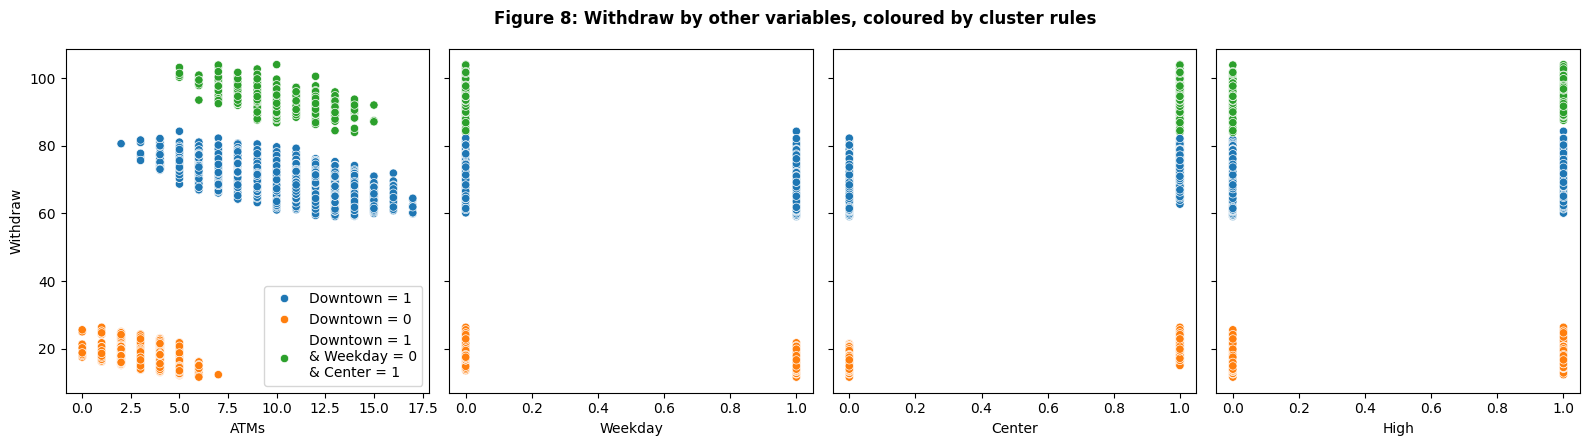

In [ ]:
"""
Figure 8: Withdraw by other variables, coloured by cluster rules
"""
fig_name = 'withdraw_by_other_vars_coloured.jpg'

fig, axes = plt.subplots(1,4, figsize=(16,4.5), sharey=True)
atm[''] = np.where((atm['Downtown'] == 0), 'Downtown = 0', np.where((atm['Downtown'] == 1) & (atm['Weekday'] == 0) & (atm['Center'] == 1), 'Downtown = 1\n& Weekday = 0\n& Center = 1', 'Downtown = 1'))

sns.scatterplot(ax=axes[0], x='ATMs', y='Withdraw', hue='', data=atm)
sns.scatterplot(ax=axes[1], x='Weekday', y='Withdraw', hue='', data=atm)
sns.scatterplot(ax=axes[2], x='Center', y='Withdraw', hue='', data=atm)
sns.scatterplot(ax=axes[3], x='High', y='Withdraw', hue='', data=atm)

# Set titles
axes[0].set_xlabel('ATMs')
axes[1].set_xlabel('Weekday')
axes[2].set_xlabel('Center')
axes[3].set_xlabel('High')

axes[0].set_ylabel('Withdraw')

axes[1].get_legend().remove()
axes[2].get_legend().remove()
axes[3].get_legend().remove()


fig.suptitle('Figure 8: Withdraw by other variables, coloured by cluster rules', fontweight='bold')

plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)
# plt.show()

In [ ]:
"""
Figure 8: withdraw_by_shops_with_model_lines
"""

coeffs= [
        18.815099198449325,
        0.09162183145755232,
        0.22452714168222548,
        -0.5775168407592518,
        0.019967557090320175,
        0.018493494302836314,
        -1.0005426733632976,
        -47.89667724968706,
        -2.217805614951019,
        3.5912300495595857,
        1.002023243775274
]

def uptown_rule(coeffs, shops, averages):
        return coeffs[0] + coeffs[5]*shops + coeffs[6]*averages['ATMs'] + coeffs[8]*averages['Weekday'] + coeffs[9]*averages['Center'] + coeffs[10]*averages['High']

def downtown_low_rule(coeffs, shops, averages):
        return coeffs[0] + coeffs[1]*shops + coeffs[5]*shops + coeffs[7] + coeffs[6]*averages['ATMs'] + coeffs[8]*averages['Weekday'] + coeffs[9]*averages['Center'] + coeffs[10]*averages['High']

def downtown_high_rule(coeffs, shops, averages):
        return coeffs[0] + coeffs[1]*shops + coeffs[3] + coeffs[4]*shops + coeffs[5]*shops + coeffs[7] + coeffs[9] + coeffs[6]*averages['ATMs'] + coeffs[10]*averages['High']

formula = "Withdraw ~ Shops_DT + Weekday__DT + Center_DT + Shops_DWC + Shops + ATMs + Downtown + Weekday + Center + High" 

fig_name = 'withdraw_by_shops_coloured_3.jpg'

fig, axes = plt.subplots(1,1, figsize=(6,4.5))
atm[''] = np.where((atm['Downtown'] == 0), 'Downtown = 0', np.where((atm['Downtown'] == 1) & (atm['Weekday'] == 0) & (atm['Center'] == 1), 'Downtown = 1\n& Weekday = 0\n& Center = 1', 'Downtown = 1'))
sns.scatterplot(axes=axes, x='Shops', y='Withdraw', hue='', data=atm)
uptown_x = np.arange(50,150,0.1)
downtown_x = np.arange(900,1100,0.1)

# Get averages for uptown group
uptown_averages = atm[atm[''] == 'Downtown = 0'][['ATMs', 'Weekday', 'Center', 'High']].mean()
downtown_low_averages = atm[atm[''] == 'Downtown = 1'][['ATMs', 'Weekday', 'Center', 'High']].mean()
downtown_high_averages = atm[atm[''] == 'Downtown = 1\n& Weekday = 0\n& Center = 1'][['ATMs', 'High']].mean()

sns.lineplot(ax=axes, x=downtown_x, y=downtown_low_rule(coeffs, downtown_x, downtown_low_averages), color='k')
sns.lineplot(ax=axes, x=uptown_x, y=uptown_rule(coeffs, uptown_x, uptown_averages), color='k')
sns.lineplot(ax=axes, x=downtown_x, y=downtown_high_rule(coeffs, downtown_x, downtown_high_averages), color='k')

# Set titles
axes.set_xlabel('Shops')
axes.set_ylabel('Withdraw')
fig.suptitle('Figure 4.1: Withdraw by Shops, coloured by cluster\nrules, with model trend line', fontweight='bold')

plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)
# plt.show()

# Not used:

In [11]:
"""
NOT USED: Atms by shops scatterplot coloured by withdraw
"""

fig_name = 'atms_by_shops_coloured.jpg'

# Create logic for colorbar
# See: https://stackoverflow.com/questions/49761221/make-seaborn-show-a-colorbar-instead-of-a-legend-when-using-hue-in-a-bar-plot/49772083#49772083
cmap = sns.color_palette("flare", as_cmap=True)
norm = plt.Normalize(atm['Withdraw'].min(), atm['Withdraw'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Create plot
fig, axes = plt.subplots(1,1, figsize=(8,6))
sns.scatterplot(ax=axes, x='ATMs', y='Shops', data=atm, hue='Withdraw', palette = cmap)

# Set titles
axes.set_xlabel('Number of ATMs')
axes.set_ylabel('Number of Shops')
axes.set_title('Number of ATMs by number of shops, coloured by Withdraw')

# Remove the legend and add a colorbar
axes.get_legend().remove()
axes.figure.colorbar(sm, ax=axes)

plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.close(fig)